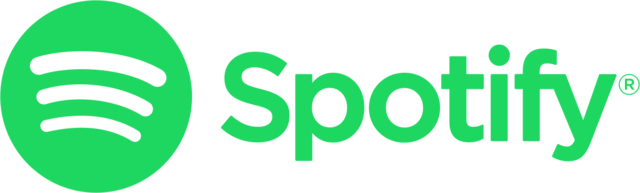

<h2>Nama Kelompok


*   M. Daffa Aqilaa (2021-168)
*   Ahmad Zaidan (2021-171)
*   Ach. Sofyan Daynur (2021-155)
*   Dzikriansyah Nusa Saputra (2021-186)



## Deskripsi Dataset

<p> Kami memilih topik "popularitas" sebagai bagian utama dalam analisis ini. bagaimana sebuah lagu atau artis atau album bisa populer berdasarkan beberapa faktor yang akan dilihat dalam file ini

Data Description


*   track_id: ID unik untuk setiap lagu.
*   track_name: Nama lagu.
*   track_artist: Nama artis yang membawakan lagu.
*   track_popularity: Tingkat popularitas lagu.
*   track_album_id: ID unik album tempat lagu berada.
*   track_album_name: Nama album tempat lagu berada.
*   track_album_release_date: Tanggal rilis album.
*   playlist_name: Nama playlist yang mencakup lagu.
*   playlist_id: ID unik playlist.
*   playlist_genre: Genre utama dari playlist.
*   playlist_subgenre: Subgenre dari playlist.
*   danceability: Seberapa mudah lagu bisa digunakan untuk menari.
*   energy: Tingkat energi dan intensitas lagu.
*   key: Kunci musik dari lagu.
*   loudness: Tingkat kenyaringan lagu, diukur dalam desibel.
*   mode: Modus (mayor atau minor) dari lagu.
*   speechiness: Proporsi lirik yang diucapkan dalam lagu.
*   acousticness: Tingkat keakustikan lagu.
*   instrumentalness: Seberapa besar lagu berisi instrumen tanpa vokal.
*   liveness: Tingkat kehadiran live dari lagu.
*   valence: Tingkat positivitas atau kebahagiaan dalam lagu.
*   tempo: Kecepatan tempo lagu, diukur dalam BPM (Beats Per Minute).
*   duration_ms: Durasi lagu dalam milidetik.




## Import Library

In [2]:
# Library for File Management
from IPython import get_ipython
from IPython.display import display
from google.colab import drive
import requests
import zipfile
import os

# Library for Load Dataset
import numpy as np
import pandas as pd

# Library for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier

# Library for Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Membersihkan warning
import warnings
warnings.filterwarnings('ignore')

## Download Item

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# URL Dropbox (ubah '?dl=0' menjadi '?dl=1' agar dapat diunduh langsung)
url = "https://www.dropbox.com/sh/qj0ueimxot3ltbf/AACzMOHv7sZCJsj3ErjtOG7ya?dl=1"
download_url = url.replace("?dl=0", "?dl=1")  # Untuk memastikan direct download

# Nama file unduhan
output_file = "spotify.zip"

# Path Google Drive untuk menyimpan file
drive_path = "/content/drive/MyDrive/bigData_project"  # Ubah path sesuai kebutuhan

# Fungsi untuk mengunduh file
def download_file(url, output_file):
    print("Mengunduh dataset...")
    response = requests.get(url, stream=True)
    with open(output_file, "wb") as file:
        for chunk in response.iter_content(chunk_size=1024):
            file.write(chunk)
    print("Unduhan selesai!")

# Jalankan proses unduh
try:
    # Periksa apakah file sudah ada di Google Drive
    if not os.path.exists(os.path.join(drive_path, output_file)):
        download_file(download_url, output_file)
        # Pindahkan file zip ke Google Drive
        !mv "{output_file}" "{drive_path}"
    else:
        print(f"File {output_file} sudah ada di Google Drive.")

    print("Dataset siap digunakan!")  # File zip di Google Drive, siap diekstrak secara manual
except Exception as e:
    print(f"Terjadi kesalahan: {e}")

# Hapus file zip setelah unduhan (opsional)
# if os.path.exists(output_file):
    # os.remove(output_file)
    # print(f"File zip {output_file} telah dihapus.")

File spotify.zip sudah ada di Google Drive.
Dataset siap digunakan!


In [ ]:
# Extract the zip file
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/bigData_project/spotify.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/bigData_project')

## Load Dataset

In [5]:
# Assuming the downloaded file is a CSV, replace 'your_file.csv' with the actual filename
file_path = os.path.join(drive_path, '/content/drive/MyDrive/bigData_project/spotify_songs.csv')  # Update 'your_file.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")

    # Display some info about the DataFrame
    print(df.head())

except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please check the file path.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the file at '{file_path}'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset loaded successfully!
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (w

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
print(df.shape)

(32833, 23)


In [ ]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

## Handling Missing Value

<p>penjelasan mengenai manakah kolom yang mempunyai data kosong, dijelaskan berikut

In [6]:
print(df.isnull().sum())

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


<p>"track_name" mempunyai 5 nilai kosong. kami akan mengisinya dengan "unknown"

In [7]:
# Fill missing values in 'track_name' with "unknown"
df['track_name'].fillna("unknown", inplace=True)

<p>track_artist mempunyai 5 nilai yang hilang. kami akan mengisinya dengan "unknown"

In [8]:
# Fill missing values in 'track_artist' with "unknown"
df['track_artist'].fillna("unknown", inplace=True)

<p>"track_album_name" mempunyai 5 nilai yang hilang. kami akan mengisinya dengan "unknown"

In [9]:
# Fill missing values in 'track_album_name' with "unknown"
df['track_album_name'].fillna("unknown", inplace=True)

<p>sekarang mari kita cek dataset kembali

In [10]:
print(df.isnull().sum())

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


<p>sekarang dengan penanganan nilai kosong sudah selesai, maka sudah tidak ada lagi nilai yang kosong

## Visualisasi Dasar

<h2> Popularitas Lagu Berdasarkan Genre

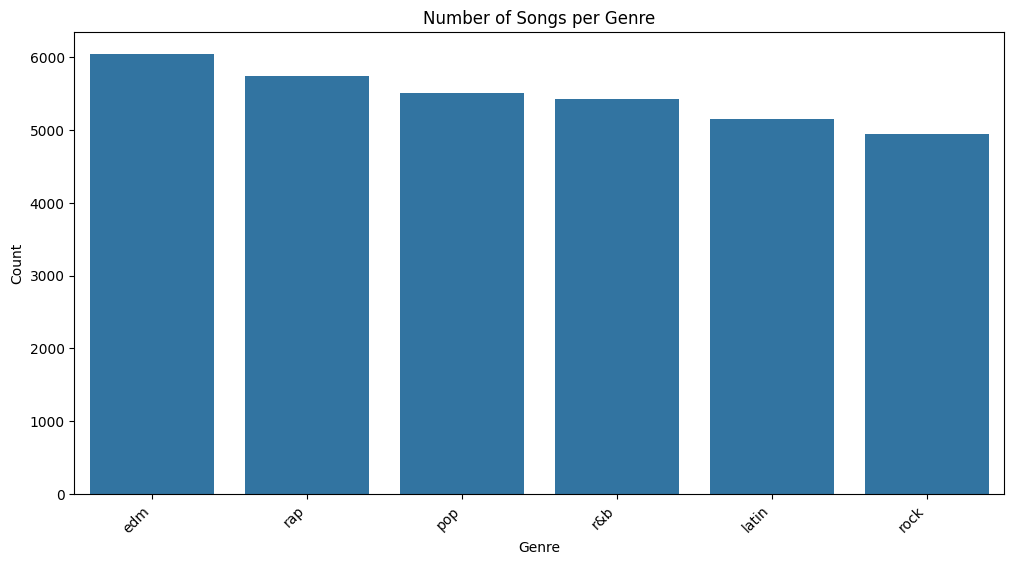

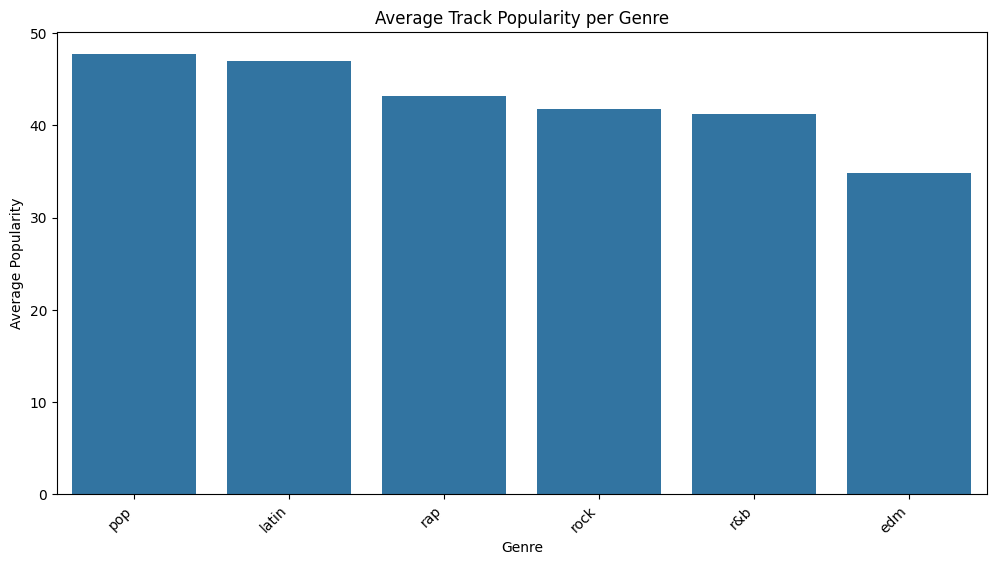

In [11]:
# Analyze popularity by genre
plt.figure(figsize=(12, 6))
sns.countplot(x='playlist_genre', data=df, order=df['playlist_genre'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Songs per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# Calculate average popularity per genre
genre_popularity = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values)
plt.xticks(rotation=45, ha='right')
plt.title('Average Track Popularity per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.show()

<h2> Jumlah Lagu per Artis

track_artist
Martin Garrix       161
Queen               136
The Chainsmokers    123
David Guetta        110
Don Omar            102
                   ... 
Men Without Hats      1
Memphis May Fire      1
Memphis Bleek         1
Melvin Ayala          1
香取慎吾                  1
Name: track_name, Length: 10693, dtype: int64


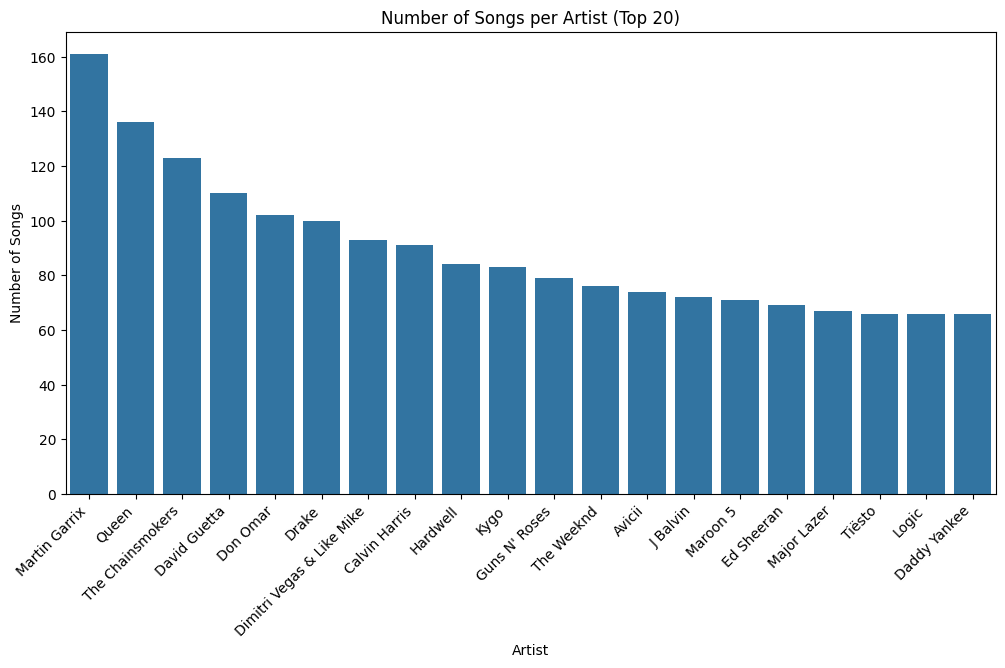

In [12]:
# Calculate the number of songs per artist
songs_per_artist = df.groupby('track_artist')['track_name'].count().sort_values(ascending=False)

# Display the result
print(songs_per_artist)

# Visualization (optional)
plt.figure(figsize=(12, 6))
sns.barplot(x=songs_per_artist.head(20).index, y=songs_per_artist.head(20).values) # Show top 20
plt.xticks(rotation=45, ha='right')
plt.title('Number of Songs per Artist (Top 20)')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.show()

<h2>Distribusi Popularitas Lagu

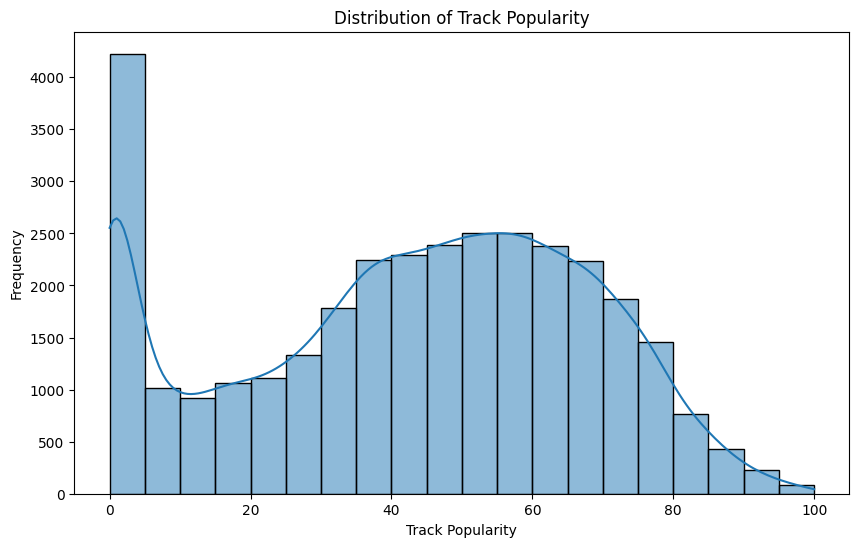

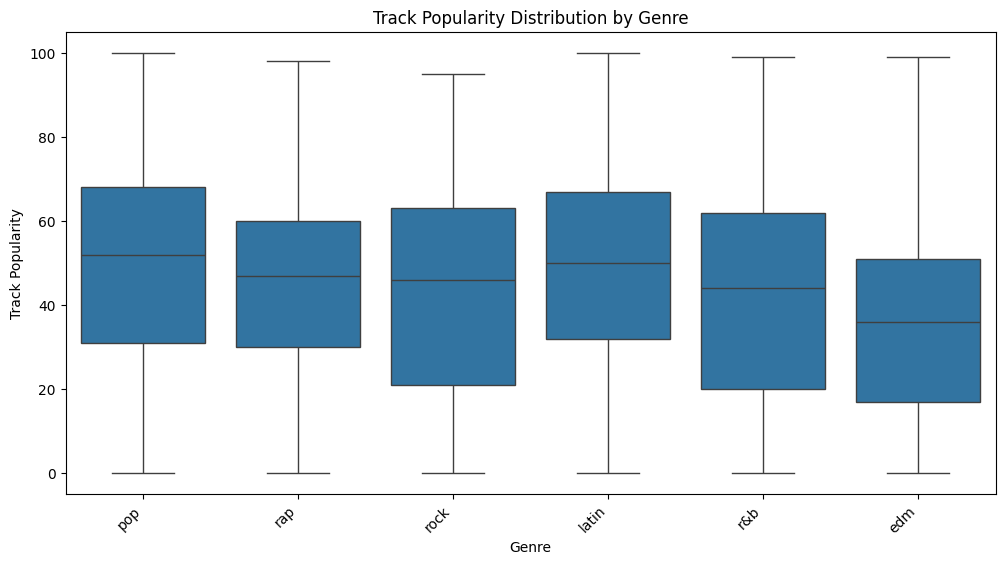

In [13]:
# Analyze popularity distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

# Box plot of popularity by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='playlist_genre', y='track_popularity', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Track Popularity Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Track Popularity')
plt.show()

<h2>Distribusi Durasi Lagu

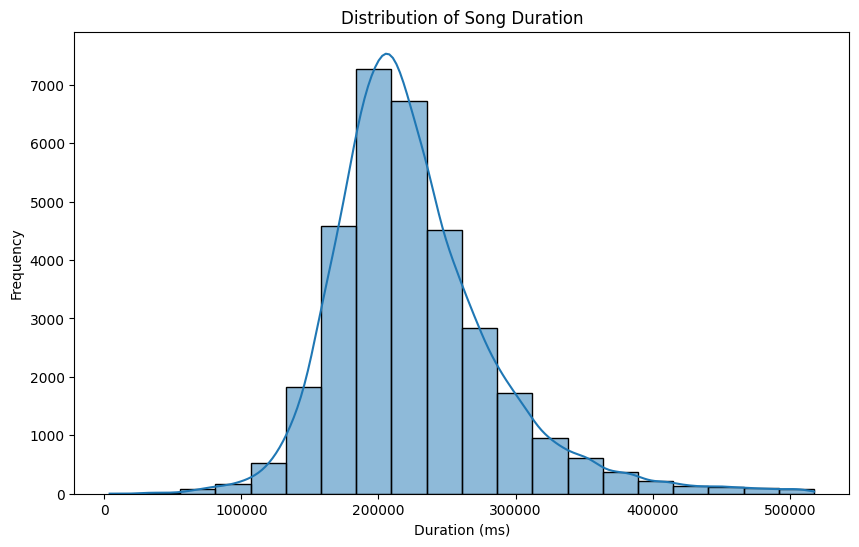

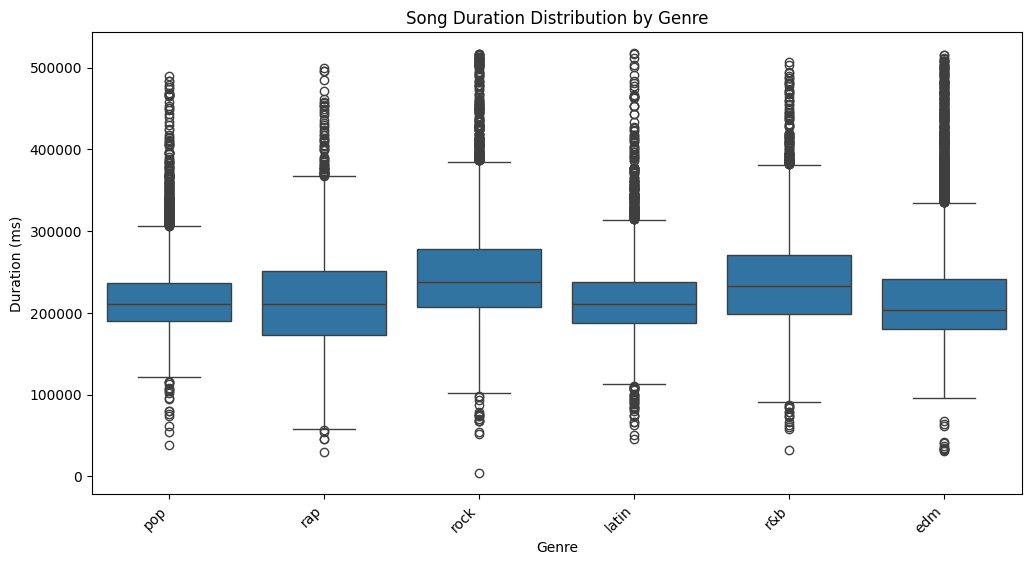

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_ms'], bins=20, kde=True)
plt.title('Distribution of Song Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()

# Box plot of duration by genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='playlist_genre', y='duration_ms', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Song Duration Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Duration (ms)')
plt.show()

<h2>Energi dan Danceability Berdasarkan Genre

<Figure size 1200x600 with 0 Axes>

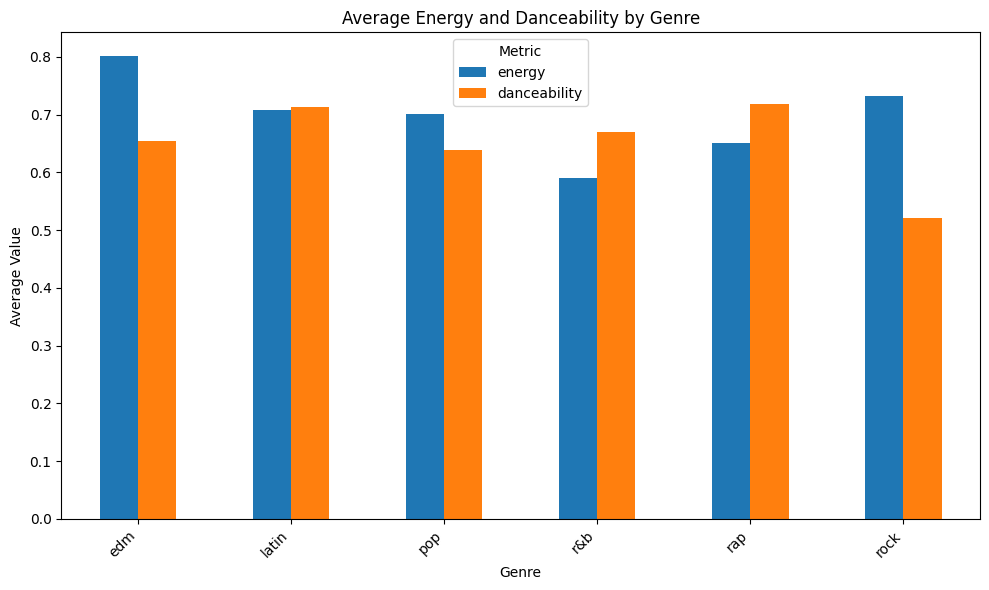

In [15]:
# Group data by genre and calculate the average energy and danceability
genre_energy_danceability = df.groupby('playlist_genre')[['energy', 'danceability']].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
genre_energy_danceability.plot(kind='bar', figsize=(10, 6))
plt.title('Average Energy and Danceability by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

<h2>Tahun Rilis Album Berdasarkan Genre

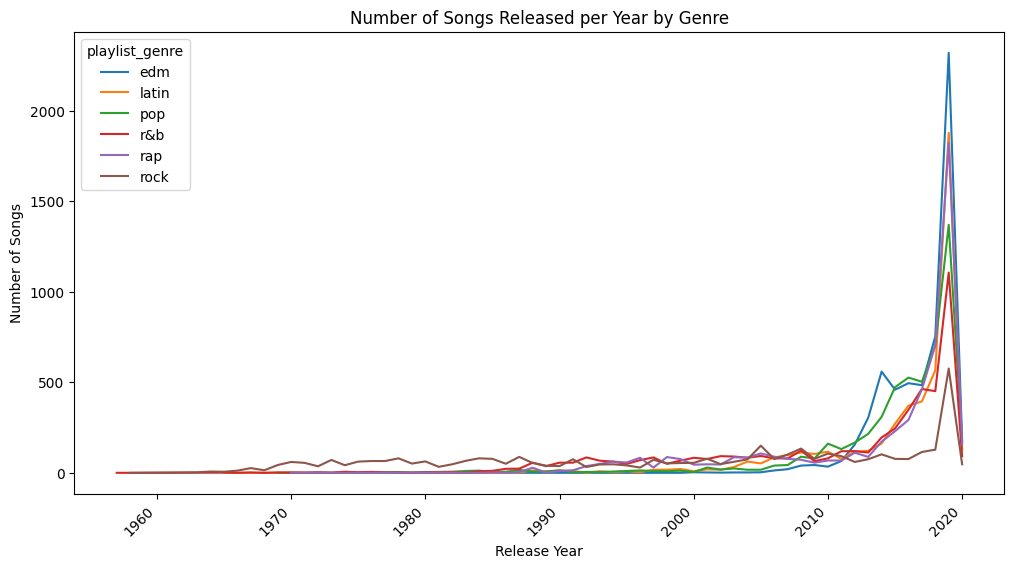

In [16]:
# Convert 'track_album_release_date' to datetime objects
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Extract the year
df['release_year'] = df['track_album_release_date'].dt.year

# Group by genre and release year, then count the number of songs
genre_release_year = df.groupby(['playlist_genre', 'release_year'])['track_name'].count().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='track_name', hue='playlist_genre', data=genre_release_year)
plt.title('Number of Songs Released per Year by Genre')
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.show()

<h2>Valence dan Tempo Berdasarkan Subgenre

<Figure size 1200x600 with 0 Axes>

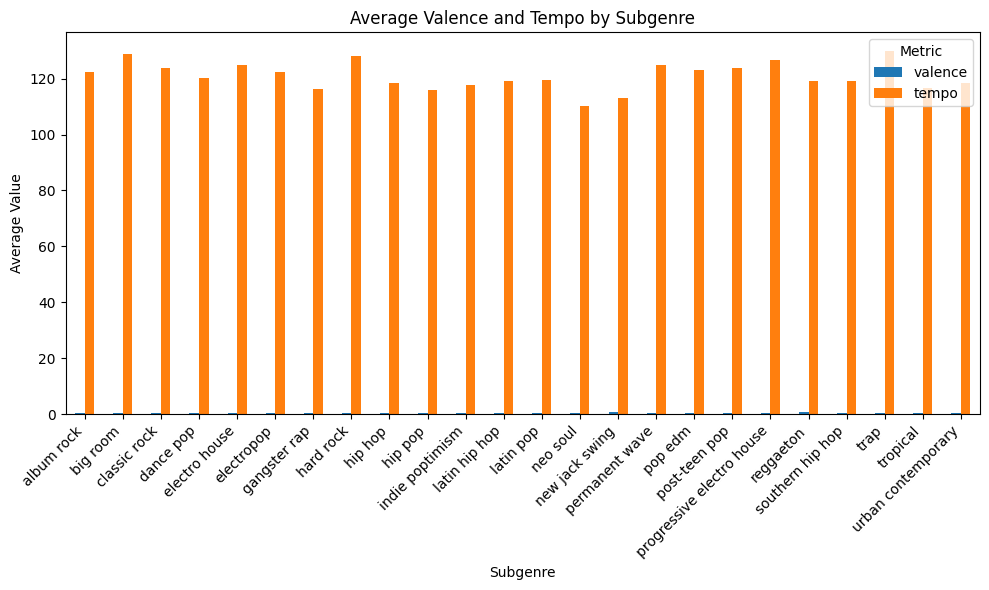

In [17]:
# Group data by subgenre and calculate the average valence and tempo
subgenre_valence_tempo = df.groupby('playlist_subgenre')[['valence', 'tempo']].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
subgenre_valence_tempo.plot(kind='bar', figsize=(10, 6))
plt.title('Average Valence and Tempo by Subgenre')
plt.xlabel('Subgenre')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

##  ANALISIS KOLOM YANG MEMPENGARUHI KEPOPULERAN LAGU/ARTIS/ALBUM (POPULARITY FACTORS)

<h2>Korelasi Popularitas dengan Fitur Numerik

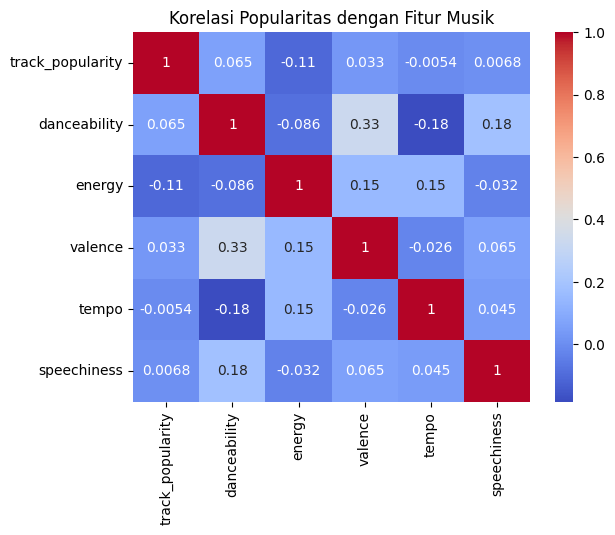

In [18]:
# Korelasi Popularitas dengan Fitur Numerik
correlation = df[['track_popularity', 'danceability', 'energy', 'valence', 'tempo', 'speechiness']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi Popularitas dengan Fitur Musik')
plt.show()

<h2>Artis dengan Popularitas Tinggi

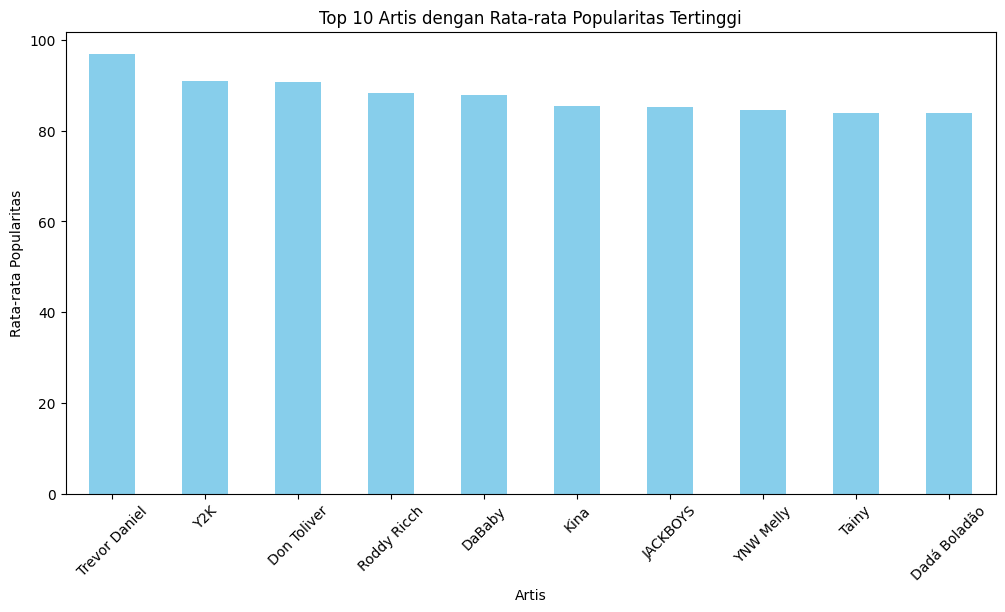

In [21]:
top_artists = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False).head(10)
top_artists.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Top 10 Artis dengan Rata-rata Popularitas Tertinggi')
plt.ylabel('Rata-rata Popularitas')
plt.xlabel('Artis')
plt.xticks(rotation=45)
plt.show()

Top Features Influencing Track Popularity:

             Feature  Importance
9            valence    0.083084
3           loudness    0.083056
1             energy    0.082992
11       duration_ms    0.082955
0       danceability    0.082945
10             tempo    0.082776
6       acousticness    0.082766
5        speechiness    0.082578
8           liveness    0.082323
7   instrumentalness    0.071973


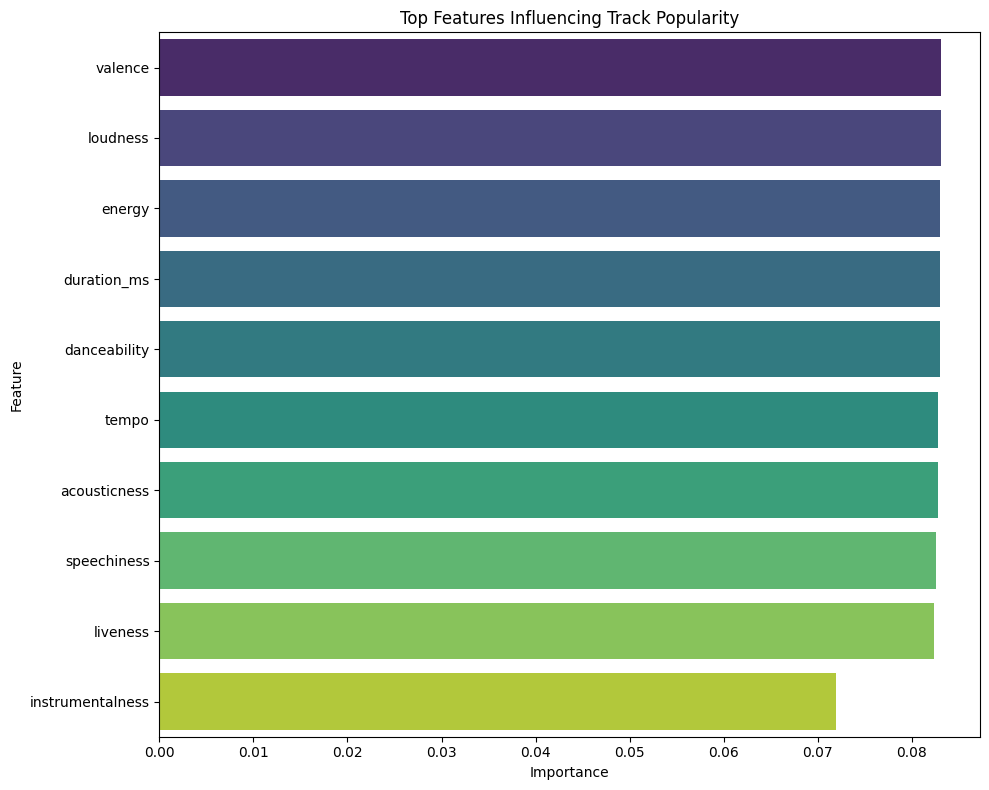

In [22]:
# Encode categorical variables
encoded_df = pd.get_dummies(df, columns=['playlist_genre', 'playlist_subgenre'], drop_first=True)

# Separate features and target
# Drop 'track_id' column along with 'track_popularity'
X = encoded_df.drop(["track_popularity", "track_id", "track_name", "track_artist", "track_album_name", "track_album_id", "playlist_name", "playlist_id", "track_album_release_date"], axis=1)  # Dropping
y = encoded_df["track_popularity"]

# Fit ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top Features Influencing Track Popularity:\n")
print(feature_importances.head(10))

# Visualizing Feature Importances
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top Features Influencing Track Popularity")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## ANALISIS DAN VISUALISASI FAKTOR-FAKTOR YANG BERKONTRIBUSI TERHADAP POPULARITAS (POPULARITY FACTORS ANALYSIS)


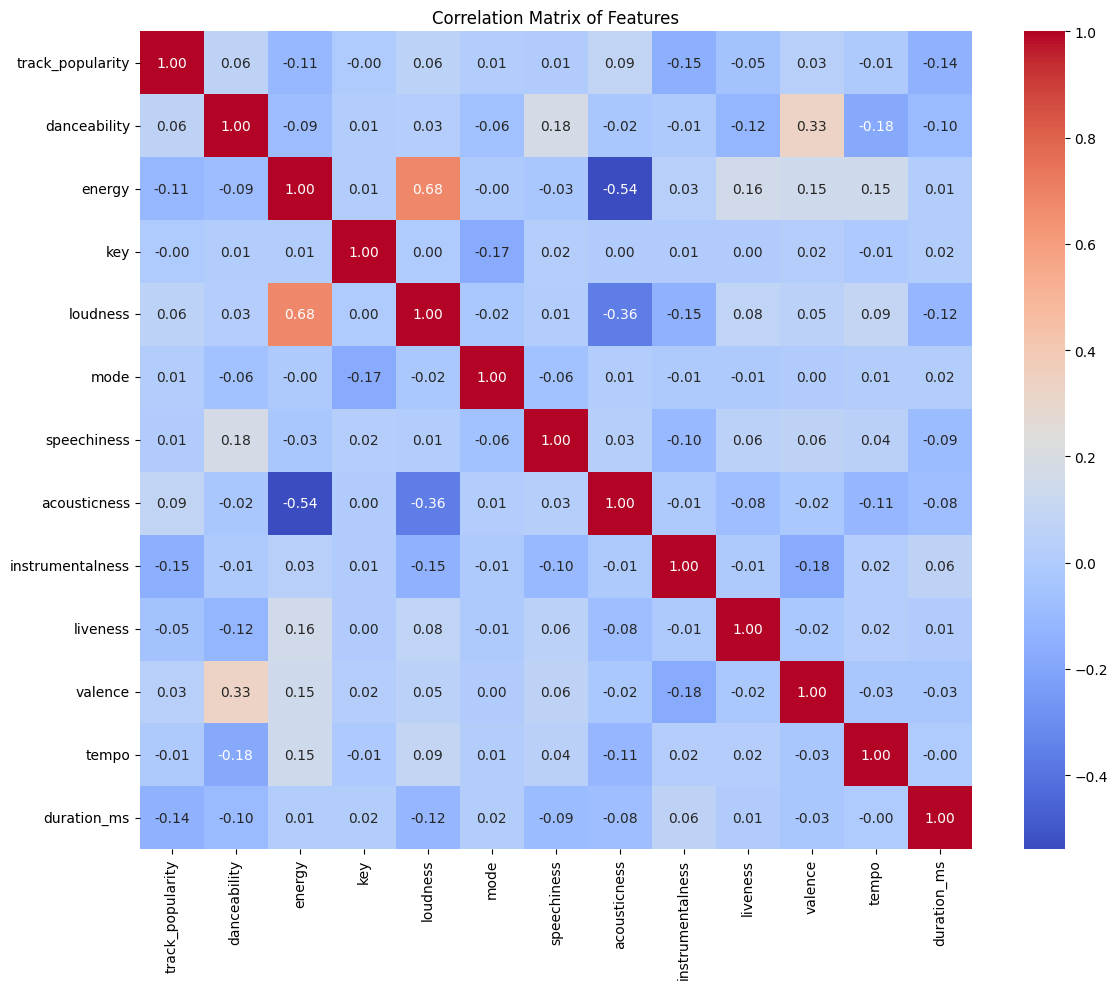

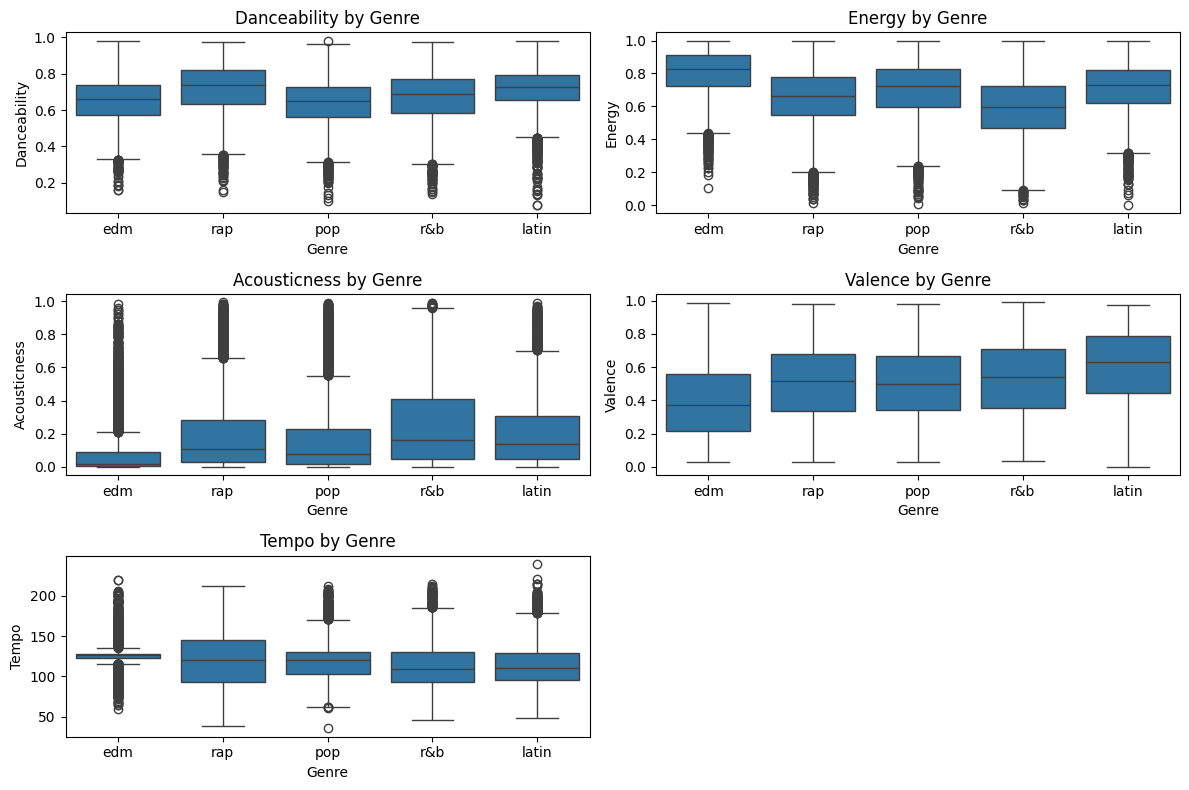

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 10))

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

corr = numeric_df.corr()  # Calculate correlation on numeric data
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Features")
plt.tight_layout()
plt.show()

# Specific Factors
factors = ['danceability', 'energy', 'acousticness', 'valence', 'tempo']
plt.figure(figsize=(12, 8))
for i, factor in enumerate(factors, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x='playlist_genre', y=factor, order=df['playlist_genre'].value_counts().head(5).index)
    plt.title(f"{factor.capitalize()} by Genre")
    plt.xlabel("Genre")
    plt.ylabel(factor.capitalize())
plt.tight_layout()
plt.show()

<h2> Kesimpulan